# Figures 4 & 5: BIC & SIL curves

This notebook will reproduce Figures 4 & 5 from *A Novel Heuristic Method for Detecting Overfit in Unsupervised Classification of Climate Models*, E. Boland et al. 2023 (doi to follow). This requires the file model/BICs2-30.obj, produced using Step1_trainmodels.ipynb

Please attribute any plots or code from this notebook using the DOI from Zenodo: to come

Updated Mar 2023
E Atkinson & E Boland [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

In [2]:
ids = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2'] # Ensemble members
model_folder='model'

### Load data

In [3]:
with open('{}/BICs2-20.obj'.format(model_folder), 'rb') as file:
    BICs = pickle.load(file)
with open('{}/SILs2-20.obj'.format(model_folder), 'rb') as file:
    SILs = pickle.load(file)

### Plot BIC and $\Delta$BIC curves

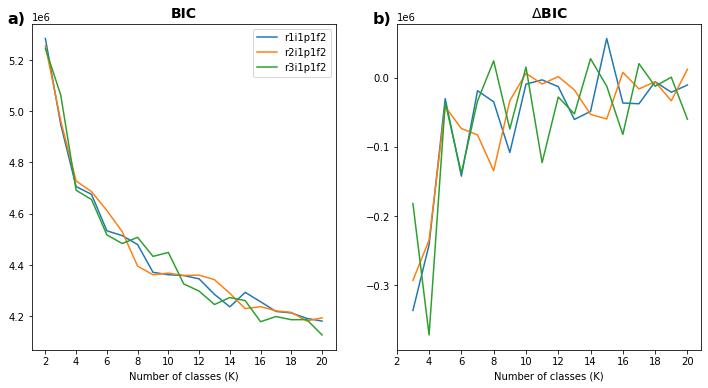

In [8]:
fig, axes = plt.subplots(1,2)
for mm,m_id in enumerate(ids):
    axes[0].plot(np.arange(2, 21), BICs[m_id], label=m_id)
    axes[1].plot(np.arange(3, 21), BICs[m_id][1:]-BICs[m_id][:-1], label=m_id)
fig.set_size_inches(12,6)
for ax in axes:
    ax.set_xlabel('Number of classes (K)')
    ax.set_xticks(np.arange(2,21,2))
axes[0].legend()
axes[0].set_title('BIC',fontsize=14,fontweight='bold')
axes[0].text(-0.08,1.0,'a)',transform=axes[0].transAxes,fontsize=16,fontweight='bold')
axes[1].set_title('$\Delta$BIC',fontsize=14,fontweight='bold')
axes[1].text(-0.08,1.0,'b)',transform=axes[1].transAxes,fontsize=16,fontweight='bold')
axes[1].ticklabel_format(axis='y',style='sci',scilimits=(6,6))
plt.savefig('figures/{}_BICs2-20.pdf'.format(model_folder), bbox_inches='tight')


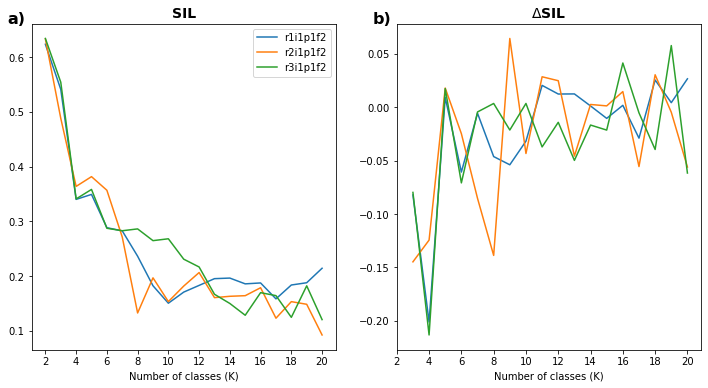

In [5]:
fig, axes = plt.subplots(1,2)
for m_id in ids:
    axes[0].plot(np.arange(2, 21), SILs[m_id], label=m_id)
    axes[1].plot(np.arange(3, 21), SILs[m_id][1:]-SILs[m_id][:-1], label=m_id)
fig.set_size_inches(12,6)
for ax in axes:
    ax.set_xlabel('Number of classes (K)')
    ax.set_xticks(np.arange(2,21,2))
axes[0].legend()
axes[0].set_title('SIL',fontsize=14,fontweight='bold')
axes[0].text(-0.08,1.0,'a)',transform=axes[0].transAxes,fontsize=16,fontweight='bold')
axes[1].set_title('$\Delta$SIL',fontsize=14,fontweight='bold')
axes[1].text(-0.08,1.0,'b)',transform=axes[1].transAxes,fontsize=16,fontweight='bold')
plt.savefig('figures/{}_SILs2-20.pdf'.format(model_folder), bbox_inches='tight')